<a href="https://colab.research.google.com/github/abdulwasaeee/Pytorch-Bootcamp/blob/main/pytorch-transfer-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision

In [2]:
torch.__version__

'2.8.0+cu126'

In [3]:
torchvision.__version__

'0.23.0+cu126'

In [4]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4393, done.
remote: Total 4393 (delta 0), reused 0 (delta 0), pack-reused 4393 (from 1)
Receiving objects: 100% (4393/4393), 764.14 MiB | 30.12 MiB/s, done.
Resolving deltas: 100% (2657/2657), done.
Updating files: 100% (248/248), done.


In [5]:
import os
import zipfile

from pathlib import Path

import requests

datapath=Path("data/")

imagepath=datapath / "pss"

if imagepath.is_dir():
  print(f"{imagepath} exists")
else:
  print("path does not exist...downloading")
  imagepath.mkdir(parents=True, exist_ok=True)

# Download the zip file to a temporary location
temp_zip_path = datapath / "temp_pizza_steak_sushi.zip"
with open(temp_zip_path, "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Extract the contents of the zip file into the imagepath directory
with zipfile.ZipFile(temp_zip_path,"r") as zipref:
  zipref.extractall(imagepath)

# Remove the downloaded zip file
os.remove(temp_zip_path)

path does not exist...downloading


In [6]:
# Setup Dirs
traindir = imagepath / "train"
testdir = imagepath / "test"

In [7]:
from torchvision import transforms
normalize= transforms.Normalize(mean=[0.485,0.456,0.406],
                                std=[0.229, 0.224, 0.225])
manualtrans= transforms.Compose([
                                  transforms.Resize((224,224)),
                                  transforms.ToTensor(),
                                  normalize
])

In [8]:
weights= torchvision.models.EfficientNet_B0_Weights.DEFAULT
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [9]:
autotrans= weights.transforms()
autotrans

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [10]:
traindl, testdl, classnames= data_setup.create_dataloaders(traindir,testdir,autotrans,batch_size=32)

In [11]:
model= torchvision.models.efficientnet_b0(weights=weights)
model

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:02<00:00, 7.32MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [12]:
from torchinfo import summary
summary(model, input_size=(1, 3, 224, 224), col_names=["input_size","output_size","num_params","trainable"])

Layer (type:depth-idx)                                  Input Shape               Output Shape              Param #                   Trainable
EfficientNet                                            [1, 3, 224, 224]          [1, 1000]                 --                        True
├─Sequential: 1-1                                       [1, 3, 224, 224]          [1, 1280, 7, 7]           --                        True
│    └─Conv2dNormActivation: 2-1                        [1, 3, 224, 224]          [1, 32, 112, 112]         --                        True
│    │    └─Conv2d: 3-1                                 [1, 3, 224, 224]          [1, 32, 112, 112]         864                       True
│    │    └─BatchNorm2d: 3-2                            [1, 32, 112, 112]         [1, 32, 112, 112]         64                        True
│    │    └─SiLU: 3-3                                   [1, 32, 112, 112]         [1, 32, 112, 112]         --                        --
│    └─Sequential: 2-2  

In [13]:
model.features

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU(inplace=True)
  )
  (1): Sequential(
    (0): MBConv(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): SiLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (activation): SiLU(inplace=True)
          (scale_activation): Sigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), 

In [14]:
for param in model.features.parameters():
  print(param)

Streaming output truncated to the last 5000 lines.
         1.0301,  0.7455,  0.4211,  1.8920,  1.6422,  1.0864,  0.6152,  1.4199,
         1.9136,  1.0931,  1.3090,  1.1073,  1.0748,  0.6931,  0.1781,  0.2796,
         1.4988,  1.5518,  1.1365,  1.8362,  1.4830,  1.0562,  2.1873,  1.6919,
         1.0232,  1.0457,  1.1554,  0.2537,  0.4838,  0.8742,  0.1605,  1.3541,
         1.2461,  0.9195,  0.5813,  1.5714,  0.0613,  1.0800,  1.0305,  0.9688,
         0.8825,  1.3544,  0.9401,  0.2716,  1.0987,  2.4851,  0.3223,  0.4723,
         0.8004,  0.6051,  0.2155,  1.7699,  0.0683,  1.0769,  0.0882,  1.4726,
         0.7560,  0.4746,  1.3832,  0.7507,  1.3164,  0.5835,  0.3116,  1.7398,
         1.1663,  0.4408,  0.8997,  1.0494,  1.3308,  1.4908,  1.0511,  2.3254,
         1.1091,  1.2917,  0.9891,  0.7814,  0.8032,  0.1800,  1.6238,  0.2936,
         2.2015,  1.4586,  0.5483,  0.8732,  1.3206,  1.1712,  1.3641,  0.9836,
         1.2178,  1.3223,  0.8376,  1.6825,  1.0741,  1.5837,  0.9248

In [15]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [16]:
classnames

['pizza', 'steak', 'sushi']

In [17]:
torch.manual_seed(42)

model.classifier=nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=len(classnames))
)

model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=3, bias=True)
)

In [18]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [19]:
lossfn= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(), lr= 0.001)

In [20]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [21]:
from going_modular.going_modular import engine

torch.manual_seed(42)

from timeit import default_timer as timer
start= timer()

results= engine.train(model=model, train_dataloader=traindl, test_dataloader=testdl, optimizer= optimizer, loss_fn= lossfn, epochs=5, device=device)

end=timer()

print(f"finished in {end-start} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch: 1 | train_loss: 0.7682 | train_acc: 0.6328 | test_loss: 0.3387 | test_acc: 0.8456
Epoch: 2 | train_loss: 0.2919 | train_acc: 0.8359 | test_loss: 0.2860 | test_acc: 0.9280
Epoch: 3 | train_loss: 0.2458 | train_acc: 0.8672 | test_loss: 0.2263 | test_acc: 0.9688
Epoch: 4 | train_loss: 0.3213 | train_acc: 0.8633 | test_loss: 0.2095 | test_acc: 0.9280
Epoch: 5 | train_loss: 0.1153 | train_acc: 1.0000 | test_loss: 0.2426 | test_acc: 0.9280
finished in 202.33641838799997 seconds


In [26]:
from typing import List, Tuple

from PIL import Image

def predimage(model: torch.nn.Module, image_path: str, class_names: List[str], image_size: Tuple[int,int], device=device):
  img=Image.open(image_path)
  imgtrans=transforms.Compose([
                                  transforms.Resize(image_size),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485,0.456,0.406],
                                std=[0.229, 0.224, 0.225])
                              ])
  model.eval()
  with torch.inference_mode():
    transedimg=imgtrans(img).unsqueeze(dim=0).to(device)
    pred=model(transedimg)
  prob=torch.softmax(pred,dim=1)
  label=torch.argmax(prob,dim=1)

  plt.imshow(img)
  plt.title(f"Pred: {class_names[label]} | Prob: {prob.max():.3f}")
  plt.axis(False)
  plt.show()

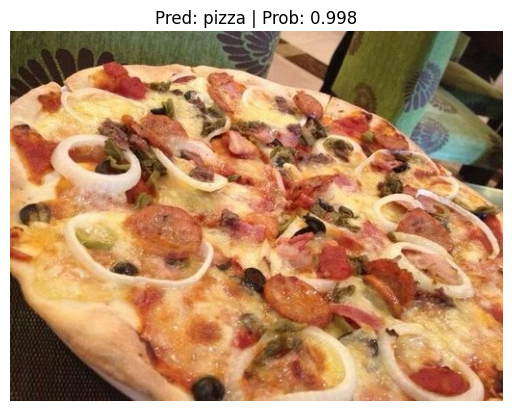

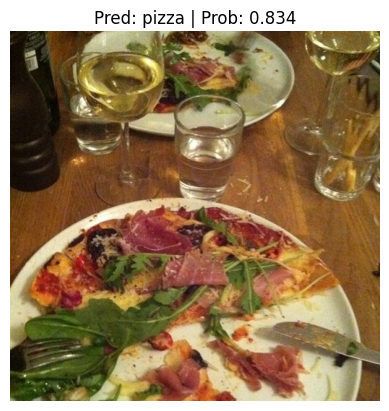

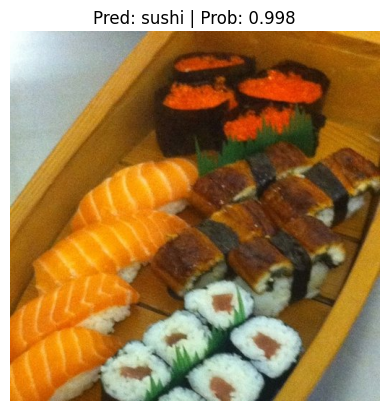

In [27]:
import random
n=3
pathlist= list(Path(testdir).glob("*/*jpg"))
pathlistsample= random.sample(population= pathlist, k=n)

for imagepath in pathlistsample:
  predimage(model=model, image_path= imagepath, class_names= classnames, image_size=(224,224)  )

In [32]:
newimg="newimg.jpg"

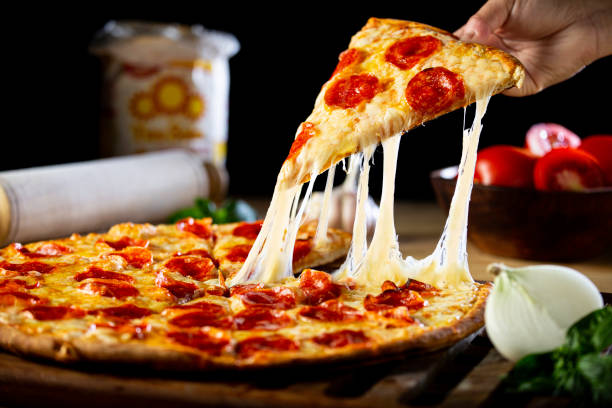

In [33]:
Image.open(newimg)

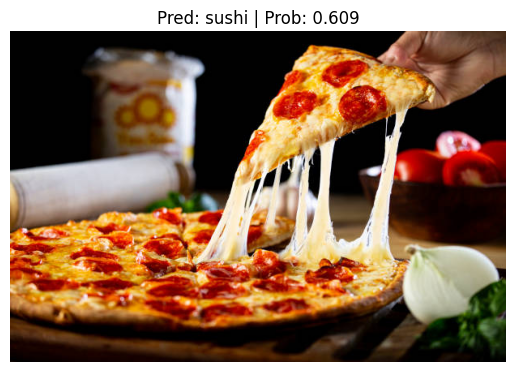

In [37]:
predimage(model=model, image_path= "newimg.jpg", class_names= classnames, image_size=(224,224)  )